<a href="https://colab.research.google.com/github/juliuswiscmsba/NLP-Disaster-Tweets/blob/main/Disaster_Tweets_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [2]:
nltk.download(['stopwords',
               'wordnet',
               'omw-1.4'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
from google.colab import files
train = files.upload()
test = files.upload()

Saving train.csv to train (1).csv


Saving test.csv to test (1).csv


In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [5]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
#Deal with NA
train.keyword.fillna('Unknown', inplace=True)
train.location.fillna('Unknown', inplace=True)
test.keyword.fillna('Unknown', inplace=True)
test.location.fillna('Unknown', inplace=True)

In [7]:
#Observe 'Keywords' column
train.keyword.value_counts().head(20)
#Some unknown value 
#Lemmatize seems to be a good method to deal with it. (weapon and weapons)

Unknown        61
fatalities     45
deluge         42
armageddon     42
sinking        41
damage         41
harm           41
body%20bags    41
evacuate       40
fear           40
outbreak       40
siren          40
twister        40
windstorm      40
collided       40
sinkhole       39
sunk           39
hellfire       39
weapon         39
weapons        39
Name: keyword, dtype: int64

In [8]:
#Observe 'location' column
train.location.value_counts().head(20)
#Too many unknown value, we should drop this column when running a ML or DL model, otherwise it may create noise that impact our predict.

Unknown            2535
USA                 104
New York             71
United States        50
London               45
Canada               29
Nigeria              28
UK                   27
Los Angeles, CA      26
India                24
Mumbai               22
Washington, DC       21
Kenya                20
Worldwide            19
Chicago, IL          18
Australia            18
California           17
Everywhere           15
California, USA      15
New York, NY         15
Name: location, dtype: int64

Text(0.5, 1.0, 'Distribution of words in each text')

<Figure size 576x360 with 0 Axes>

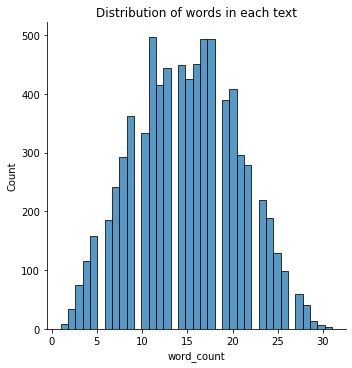

In [9]:
#Observe 'text' column 
train['word_count'] = train['text'].apply(lambda x : len(x.split()))
plt.figure(figsize = (8,5))
sns.displot(data=train, x='word_count')
plt.title("Distribution of words in each text")
#Most tweets contain less than 30 words, and the distribution looks good.

Text(0.5, 1.0, 'Distribution of the Target Label')

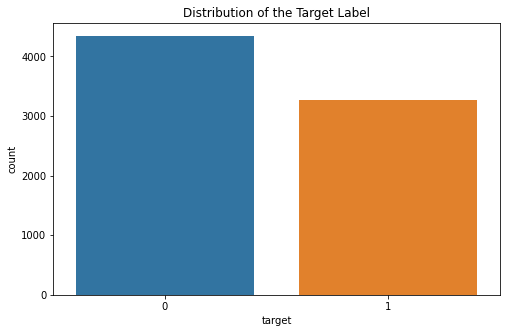

In [10]:
#Oberseve 'target' column
plt.figure(figsize = (8,5))
sns.countplot(data = train, x = 'target')
plt.title('Distribution of the Target Label')
#0 is slightly more than 1 -> if unbalance, we should deal with it.

In [11]:
#Text cleaning and lemmatize
def clean_text(text):
    text = text.lower()
    space = re.compile('[/(){}\[\]\|@,;#]')
    text = re.sub(space,' ', text) 
    ignore = re.compile('[^0-9a-z #+_]')
    text = re.sub(ignore,'', text)
    return text

def remove_stopwords(text):
    StopWords = nltk.corpus.stopwords.words('english')
    text = ' '.join(word for word in text.split() if word not in StopWords) # remove stopwors from text
    return text

def remove_html(text):
    html = re.compile(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    return re.sub(html, '', text)

def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)

def remove_emoji(text):
    emoji_pattern = re.compile(
        '['
        u'\U0001F600-\U0001F64F'
        u'\U0001F300-\U0001F5FF'  
        u'\U0001F680-\U0001F6FF'  
        u'\U0001F1E0-\U0001F1FF'  
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def lemmatizer(text):
    text = text.split(" ")
    word_lem = WordNetLemmatizer()
    l_text = ""
    for t in text:
        l = word_lem.lemmatize(t)
        l_text += l
        l_text += " "
    
    return l_text

train['text'] = train['text'].apply(remove_html)
train['text'] = train['text'].apply(remove_url)
train['text'] = train['text'].apply(remove_emoji)
train['text'] = train['text'].apply(clean_text)
train['text'] = train['text'].apply(remove_stopwords)
train['text'] = train['text'].apply(lemmatizer)
train['keyword'] = train['keyword'].apply(lemmatizer)

test['text'] = test['text'].apply(remove_html)
test['text'] = test['text'].apply(remove_url)
test['text'] = test['text'].apply(remove_emoji)
test['text'] = test['text'].apply(clean_text)
test['text'] = test['text'].apply(remove_stopwords)
test['text'] = test['text'].apply(lemmatizer)
test['keyword'] = test['keyword'].apply(lemmatizer)

In [12]:
#Store cleaned data
train_clean = train.copy()
test_clean = test.copy()
train_clean.to_csv('train_clean.csv', index = False)
test_clean.to_csv('test_clean.csv', index = False)
files.download('train_clean.csv')
files.download('test_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>